# Libraries and settings

In [77]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import requests
import json
import urllib
import fnmatch
import folium
from IPython.display import clear_output

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

c:\Users\tshed\Documents\Gruppenarbeit_DA


# Load the data

In [81]:
data_path = 'data_prepared.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Univariate Non-Graphical EDA

## Summary Statistics

In [82]:
summary = data.describe()
print("Summary Statistics:\n", summary)

Summary Statistics:
                 UIC         Jahr            DTV            DWV           DNWV  \
count  3.470000e+03  3470.000000    3470.000000    3470.000000    3470.000000   
mean   8.505063e+06  2020.999135    3180.785303    3540.288761    2364.142939   
std    4.635210e+03     2.160402   14984.987634   16302.445578   12109.286142   
min    8.500010e+06  2018.000000      49.000000      49.000000      49.000000   
25%    8.502024e+06  2018.000000     210.000000     220.000000     150.000000   
50%    8.504220e+06  2022.000000     590.000000     660.000000     410.000000   
75%    8.507275e+06  2023.000000    1600.000000    1800.000000    1100.000000   
max    8.588122e+06  2023.000000  423600.000000  471300.000000  349700.000000   

               lon          lat  
count  3470.000000  3470.000000  
mean      8.103440    46.977359  
std       0.966507     0.423811  
min       5.999993    45.832168  
25%       7.319571    46.658735  
50%       8.183112    47.017480  
75%       8

## Quantiles

In [83]:
quantiles = data[['DTV', 'DWV', 'DNWV']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)
print("Quantiles:\n", quantiles)

Quantiles:
           DTV      DWV    DNWV
0.05     49.0     49.0    49.0
0.10     80.0     80.0    60.0
0.25    210.0    220.0   150.0
0.50    590.0    660.0   410.0
0.75   1600.0   1800.0  1100.0
0.90   5200.0   6000.0  3500.0
0.95  12255.0  14355.0  8500.0


## Filter stations

In [84]:
filtered_data = data.loc[data['DTV'] <= 50000]

## Shape (number of rows and columns)

In [85]:
print("Shape of filtered data:", filtered_data.shape)

Shape of filtered data: (3438, 12)


## Data types

In [86]:
print("Data Types:\n", filtered_data.dtypes)

Data Types:
 Code        object
UIC          int64
Bahnhof     object
Kanton      object
ISB_GI      object
Jahr         int64
DTV          int64
DWV          int64
DNWV         int64
EVU         object
lon        float64
lat        float64
dtype: object


## Summary statistics of numeric variables

In [87]:
print("Filtered Data Summary:\n", filtered_data.describe())

Filtered Data Summary:
                 UIC         Jahr           DTV           DWV          DNWV  \
count  3.438000e+03  3438.000000   3438.000000   3438.000000   3438.000000   
mean   8.505083e+06  2020.999418   2116.964805   2376.498546   1526.985457   
std    4.647206e+03     2.160157   4866.389139   5447.821036   3643.177433   
min    8.500016e+06  2018.000000     49.000000     49.000000     49.000000   
25%    8.502025e+06  2018.000000    210.000000    220.000000    150.000000   
50%    8.504222e+06  2022.000000    580.000000    650.000000    400.000000   
75%    8.507278e+06  2023.000000   1600.000000   1800.000000   1100.000000   
max    8.588122e+06  2023.000000  49800.000000  59700.000000  45100.000000   

               lon          lat  
count  3438.000000  3438.000000  
mean      8.105507    46.975786  
std       0.967436     0.423540  
min       5.999993    45.832168  
25%       7.318623    46.658719  
50%       8.181972    47.014836  
75%       8.829818    47.333303  
m

## Statistical measures

In [88]:
print('DTV:',
      'Count:', round(filtered_data.DTV.count(), 1),
      'Min:', round(filtered_data.DTV.min(), 1),
      'Max:', round(filtered_data.DTV.max(), 1),
      'Mean:', round(filtered_data.DTV.mean(), 1),
      'Median:', round(filtered_data.DTV.median(), 1),
      'Std:', round(filtered_data.DTV.std(), 1))

DTV: Count: 3438 Min: 49 Max: 49800 Mean: 2117.0 Median: 580.0 Std: 4866.4


## Skewness and Kurtosis

In [89]:
print("Skewness:\n", filtered_data[['DTV', 'DWV', 'DNWV']].skew())
print("Kurtosis:\n", filtered_data[['DTV', 'DWV', 'DNWV']].kurtosis())

Skewness:
 DTV     4.870085
DWV     4.907834
DNWV    5.055628
dtype: float64
Kurtosis:
 DTV     29.440279
DWV     30.239776
DNWV    31.756287
dtype: float64


## Extreme values

In [90]:
low_dtv = filtered_data[filtered_data['DTV'] <= 1000]
high_dtv = filtered_data[filtered_data['DTV'] >= 100000]
print("Low DTV Stations:\n", low_dtv)
print("High DTV Stations:\n", high_dtv)

Low DTV Stations:
      Code      UIC       Bahnhof Kanton ISB_GI  Jahr  DTV  DWV  DNWV     EVU  \
0     AAT  8503124        Aathal     ZH    SBB  2018  740  800   610     SBB   
1      AB  8507472    Ausserberg     VS    BLS  2018  180  160   210     BLS   
2     ABE  8504404       Aarberg     BE    SBB  2022  520  580   400     BLS   
3     ABE  8504404       Aarberg     BE    SBB  2023  580  620   460     BLS   
5     ADZ  8509266         Ardez     GR    RhB  2018  240  250   240     RhB   
...   ...      ...           ...    ...    ...   ...  ...  ...   ...     ...   
3459  ZIZ  8509054        Zizers     GR    RhB  2022  550  570   490     RhB   
3462  ZOO  8500260  Crémines-Zoo     BE    BLS  2018   49   49    49     SBB   
3463  ZOO  8500260  Crémines-Zoo     BE    BLS  2022   70   60    90     SBB   
3464  ZOO  8500260  Crémines-Zoo     BE    BLS  2023   70   70    50     SBB   
3468  ZWD  8503405      Zweidlen     ZH    SBB  2018  100  110    70  Thurbo   

            lon     

# Univariate Graphical EDA

## Distribution of DTV (Daily Total Volume)

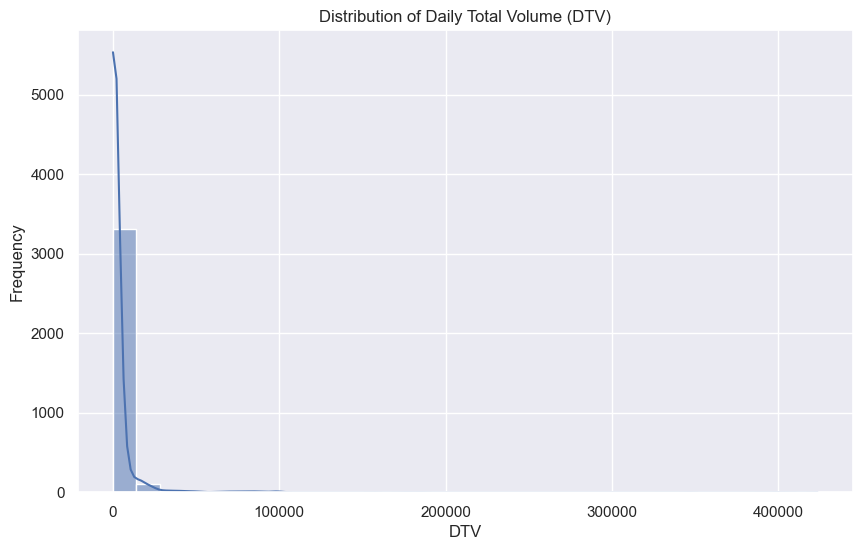

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DTV'], bins=30, kde=True)
plt.title('Distribution of Daily Total Volume (DTV)')
plt.xlabel('DTV')
plt.ylabel('Frequency')
plt.show()

## Boxplot of DTV

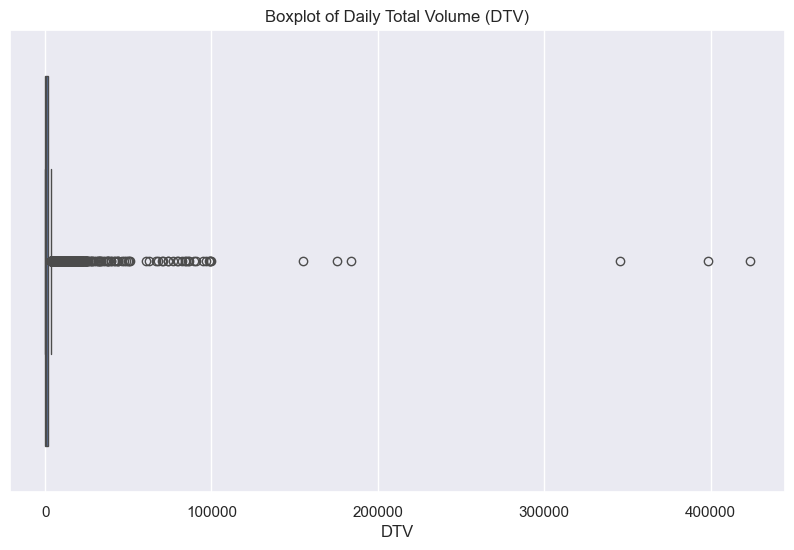

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['DTV'])
plt.title('Boxplot of Daily Total Volume (DTV)')
plt.xlabel('DTV')
plt.show()

## Density plot

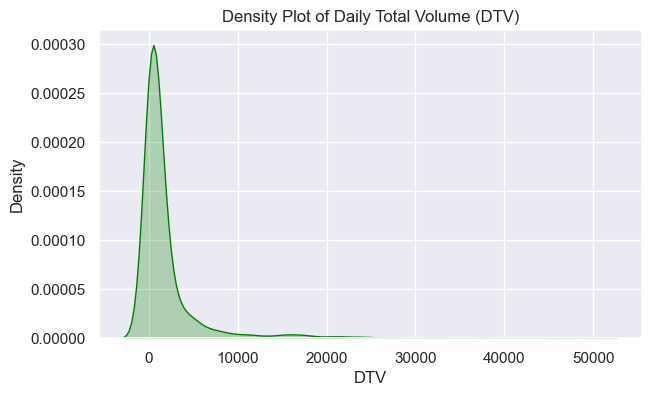

In [100]:
plt.figure(figsize=(7, 4))
sns.kdeplot(filtered_data['DTV'], color='green', fill=True)
plt.title('Density Plot of Daily Total Volume (DTV)')
plt.xlabel('DTV')
plt.show()

# Multivariate Non-Graphical EDA

## Correlation matrix

In [93]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
            UIC      Jahr       DTV       DWV      DNWV       lon       lat
UIC   1.000000  0.012839 -0.053085 -0.054952 -0.046920  0.323239 -0.010059
Jahr  0.012839  1.000000  0.002657 -0.000747  0.011716  0.000353 -0.001566
DTV  -0.053085  0.002657  1.000000  0.999268  0.993479 -0.002150  0.063461
DWV  -0.054952 -0.000747  0.999268  1.000000  0.988401 -0.004027  0.066332
DNWV -0.046920  0.011716  0.993479  0.988401  1.000000  0.003535  0.054003
lon   0.323239  0.000353 -0.002150 -0.004027  0.003535  1.000000  0.327183
lat  -0.010059 -0.001566  0.063461  0.066332  0.054003  0.327183  1.000000


## Grouping by year and summarizing DTV

In [94]:
yearly_dtv = data.groupby('Jahr')['DTV'].mean()
print("Yearly Average DTV:\n", yearly_dtv)

Yearly Average DTV:
 Jahr
2018    3171.835782
2022    2967.797064
2023    3403.291775
Name: DTV, dtype: float64


# Multivariate Graphical EDA

## Heatmap of correlations

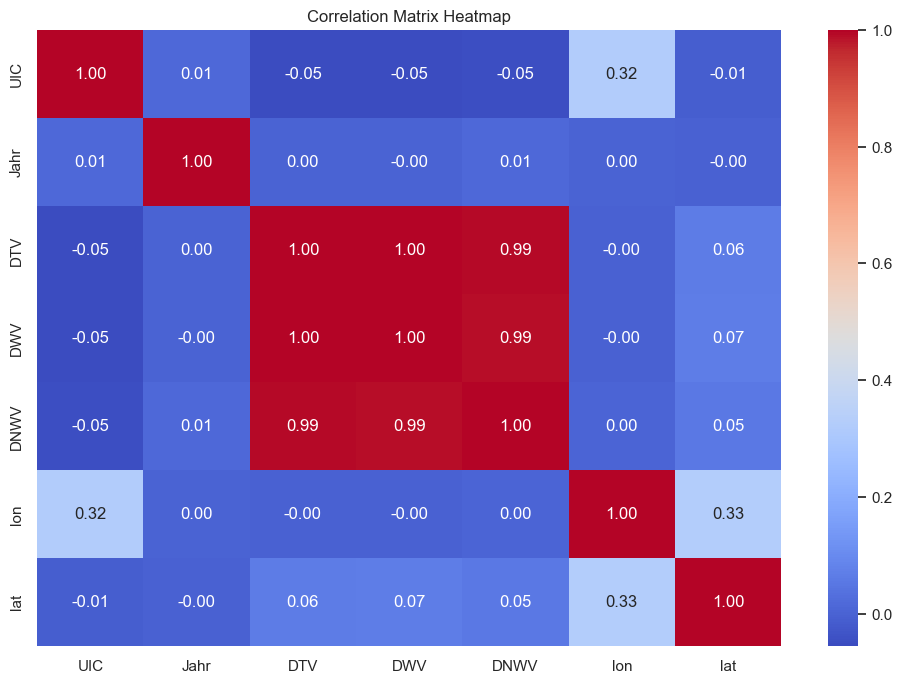

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Scatter plot of Longitude vs Latitude with DTV as size

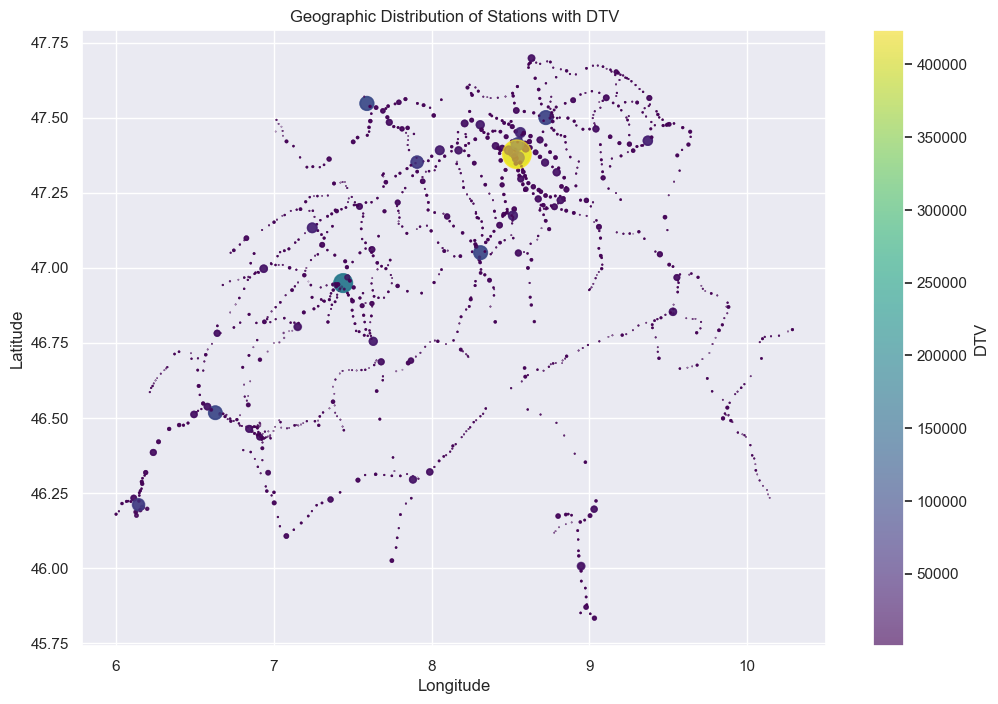

In [96]:
plt.figure(figsize=(12, 8))
plt.scatter(data['lon'], data['lat'], c=data['DTV'], s=data['DTV']/1000, cmap='viridis', alpha=0.6)
plt.colorbar(label='DTV')
plt.title('Geographic Distribution of Stations with DTV')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Geographic Visualization with Folium

## Initialize a map

In [97]:
m = folium.Map(location=[data['lat'].mean(), data['lon'].mean()], zoom_start=8)

## Add stations to the map

In [98]:
for _, row in data.iterrows():
    folium.Circle(
        location=(row['lat'], row['lon']),
        radius=row['DTV'] / 100,  # Scale the radius
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Station: {row['Bahnhof']}\nDTV: {row['DTV']}"
    ).add_to(m)

## Save and display the map

In [99]:
m.save("stations_map.html")
print("Map saved as stations_map.html")

Map saved as stations_map.html
